In [1]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from sklearn.ensemble import IsolationForest
import datetime
import time
from IPython.display import display
from haversine import haversine

In [2]:
# Carregando a base

uber = pd.read_csv('dataset/UBER_TRATADO.csv',sep=',')
print(uber.head(5))

   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0        41.06        -73.999817        40.738354         -73.999512   
1        42.16        -73.994355        40.728225         -73.994710   
2        70.63        -74.005043        40.740770         -73.962565   
3        29.02        -73.976124        40.790844         -73.965316   
4        87.60        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  dia  mes   ano  hora  minuto  distancia  
0         40.723217                1    7    5  2015  19.0    52.0      1.683  
1         40.750325                1   17    7  2009  20.0     4.0      2.458  
2         40.772647                1   24    8  2009  21.0    45.0      5.036  
3         40.803349                3   26    6  2009   8.0    22.0      1.662  
4         40.761247                5   28    8  2014  17.0    47.0      4.475  


In [5]:
# Calculo de medidas de tendencia central

m_fare_amount = uber['fare_amount'].mean()
print(f'M preço  = {m_fare_amount:.2f}')

m_distancia = uber['distancia'].mean()
print(f'M distancia = {m_distancia:.3f}')

m_distancia = uber['passenger_count'].mean()
print(f'M passageiros = {m_distancia:.3f}')

m_distancia = uber['mes'].mean()
print(f'M mes = {m_distancia:.3f}')


med_fare_amount = uber['fare_amount'].median()
print(f'Med preço = {med_fare_amount:.2f}')

med_distancia = uber['distancia'].median()
print(f'Med distancia = {med_distancia:.3f}')

med_fare_amount = uber['passenger_count'].median()
print(f'Med passageiros = {med_fare_amount:.2f}')

med_fare_amount = uber['mes'].median()
print(f'Med mes = {med_fare_amount:.2f}')


mo_fare_amount = uber['fare_amount'].mode().values
print(f'Mo preço = {mo_fare_amount}')

mo_distancia = uber['distancia'].mode().values
print(f'Mo distancia = {mo_distancia}')

mo_distancia = uber['passenger_count'].mode().values
print(f'Mo passageiros = {mo_distancia}')

mo_distancia = uber['mes'].mode().values
print(f'Mo mes = {mo_distancia}')


# Calculo de medidas de dispersão

ampl_fare_amount = uber['fare_amount'].max() - uber['fare_amount'].min()
print(f'Ampl preço = {ampl_fare_amount}') #Amplitude

ampl_distancia = uber['distancia'].max() - uber['distancia'].min()
print(f'Ampl distancia = {ampl_distancia}') #Amplitude

ampl_distancia = uber['passenger_count'].max() - uber['passenger_count'].min()
print(f'Ampl passageiros = {ampl_distancia}') #Amplitude

ampl_distancia = uber['mes'].max() - uber['mes'].min()
print(f'Ampl mes = {ampl_distancia}') #Amplitude


var_fare_amount = uber['fare_amount'].var()
print(f'Var preço = {var_fare_amount}')

var_distancia = uber['distancia'].var()
print(f'Var distancia = {var_distancia}')

var_distancia = uber['passenger_count'].var()
print(f'Var passageiros = {var_distancia}')

var_distancia = uber['mes'].var()
print(f'Var mes = {var_distancia}')

# Criando uma função de correlação para calcular a relação de forma padronizada, dentro do intervalo 0 a 1, para verificar a relação entre duas variáveis
# Quanto mais próximo de 1 maior a relação entre as variáveis e quanto mais próximo de 0 menor a relação entre as variaveis em questão.

def corr(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    x_m = x_m / np.std(x, ddof=1)
    y_m = y - np.mean(y)
    y_m = y_m / np.std(y, ddof=1)
    return (x_m * y_m).sum() / (n - 1)


print(f'Corr preço e distancia = {corr(uber['fare_amount'], uber['distancia'])}')
print(f'Corr preço e passageiros = {corr(uber['fare_amount'], uber['passenger_count'])}')
print(f'Corr preço e mes = {corr(uber['fare_amount'], uber['mes'])}')


# Criando uma função de covariância para calcular a relação de forma não padronizada, dentro do intervalo - infinito a + infinito, para verificar não só a força como também a relação linear entre duas variáveis  

def covariance(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    y_m = y - np.mean(y)
    return (x_m * y_m).sum() / (n - 1)

print(f'Cov preço e distancia = {covariance(uber['fare_amount'], uber['distancia'])}')
print(f'Cov preço e passageiros = {covariance(uber['fare_amount'], uber['passenger_count'])}')
print(f'Cov preço e mes = {covariance(uber['fare_amount'], uber['mes'])}')

M preço  = 96.62
M distancia = 35.030
M passageiros = 1.859
M mes = 6.302
Med preço = 49.28
Med distancia = 2.442
Med passageiros = 1.00
Med mes = 6.00
Mo preço = [35.59]
Mo distancia = [1.156]
Mo passageiros = [1]
Mo mes = [5]
Ampl preço = 1259.29
Ampl distancia = 8667.605
Ampl passageiros = 5
Ampl mes = 11
Var preço = 15758.132031497273
Var distancia = 16030.871289960047
Var passageiros = 2.090303428107169
Var mes = 11.842578435761872
Corr preço e distancia = 0.7344064670231677
Corr preço e passageiros = 0.3165646287592215
Corr preço e mes = 0.02231391898796255
Cov preço e distancia = 11672.595171545416
Cov preço e passageiros = 57.45388772491095
Cov preço e mes = 9.63943001102076


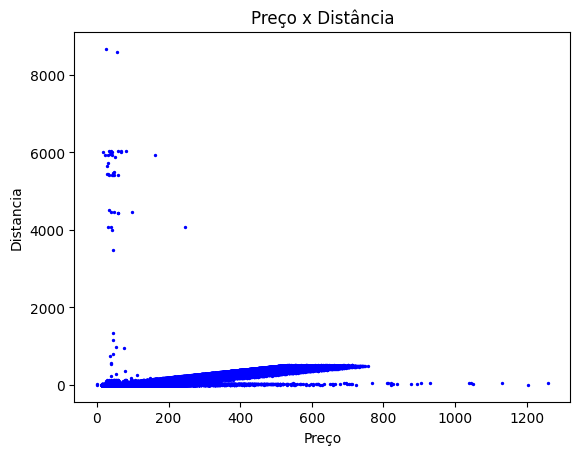

In [6]:
# Comparação entre variavel alvo e distancia

# Scatterplot

plt.scatter(uber['fare_amount'], uber['distancia'], color='blue', s=2)
plt.title('Preço x Distância')
plt.xlabel('Preço')
plt.ylabel('Distancia')
plt.show()

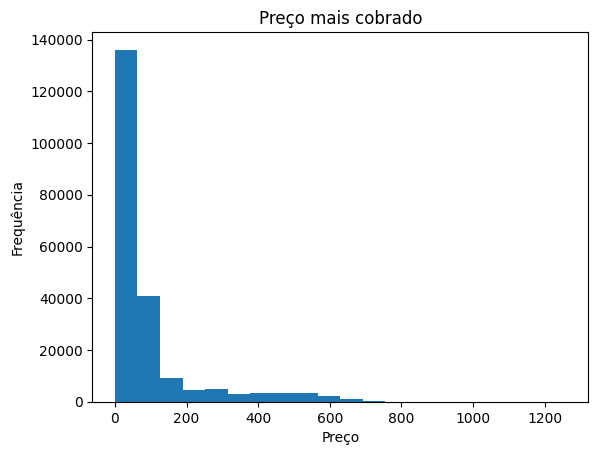

In [22]:
# Histograma

plt.hist(uber['fare_amount'], bins=20)
plt.title('Preço mais cobrado')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

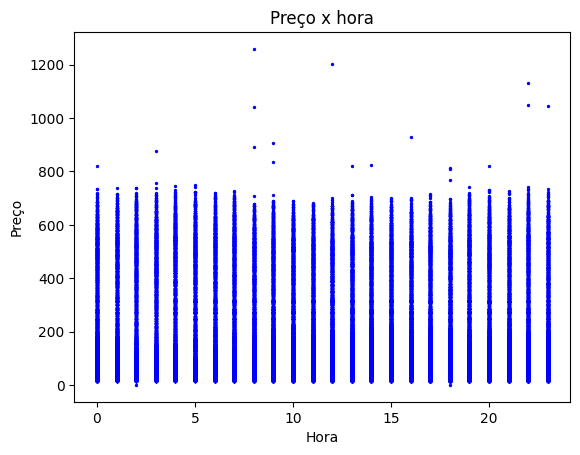

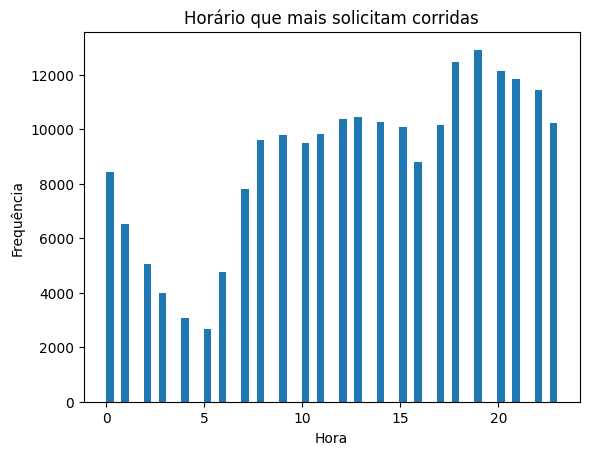

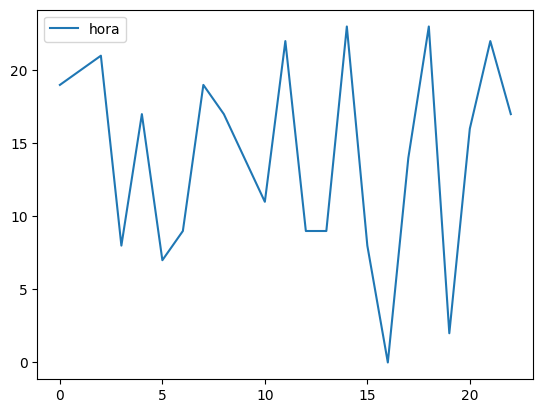

In [18]:
# Comparação entre variavel alvo e hora

plt.scatter(uber['hora'], uber['fare_amount'], color='blue', s=2)
plt.title('Preço x hora')
plt.xlabel('Hora')
plt.ylabel('Preço')
plt.show()

plt.hist(uber['hora'], bins=60)
plt.title('Horário que mais solicitam corridas')
plt.xlabel('Hora')
plt.ylabel('Frequência')
plt.show()


index_hora=[]
for i in range(0, 23):
    index_hora.append(i)
df = pd.DataFrame(uber['hora'], index=index_hora)
lines = df.plot.line()
plt.show()

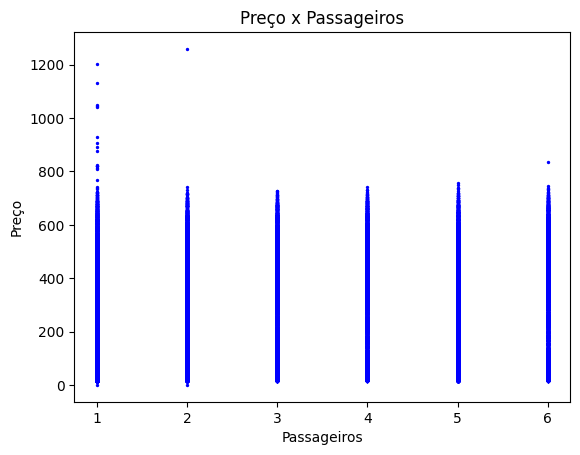

In [9]:
# Comparação entre variavel alvo e quantidade de passageiros

# Scatterplot

plt.scatter(uber['passenger_count'], uber['fare_amount'], color='blue', s=2)
plt.title('Preço x Passageiros')
plt.xlabel('Passageiros')
plt.ylabel('Preço')
plt.show()

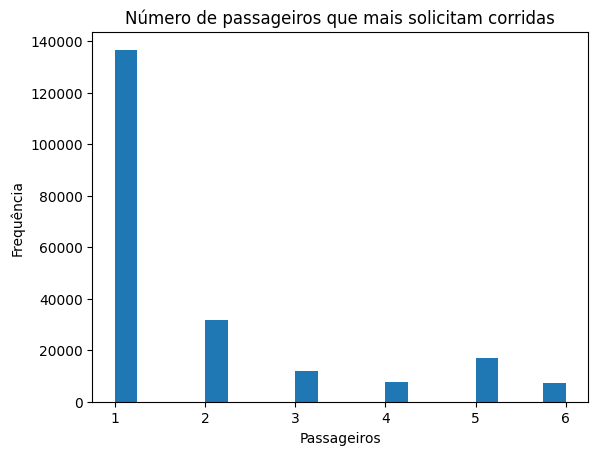

In [10]:
# Histograma


plt.hist(uber['passenger_count'], bins=20)
plt.title('Número de passageiros que mais solicitam corridas')
plt.xlabel('Passageiros')
plt.ylabel('Frequência')
plt.show()

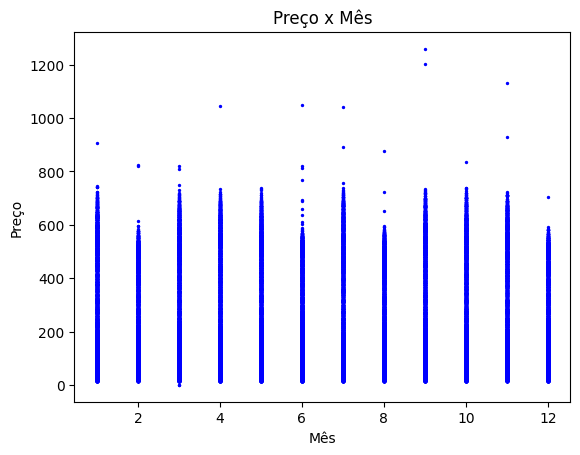

In [11]:
# Comparação entre variavel alvo e mês

# Scatterplot

plt.scatter(uber['mes'], uber['fare_amount'], color='blue', s=2)
plt.title('Preço x Mês')
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.show()

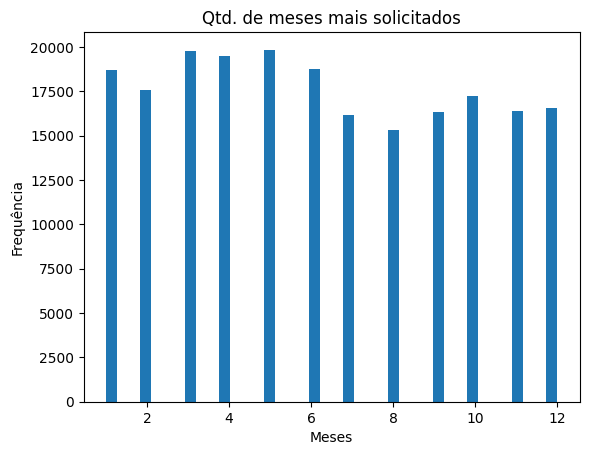

In [12]:
# Histograma

plt.hist(uber['mes'], bins=40)
plt.title('Qtd. de meses mais solicitados')
plt.xlabel('Meses')
plt.ylabel('Frequência')
plt.show()

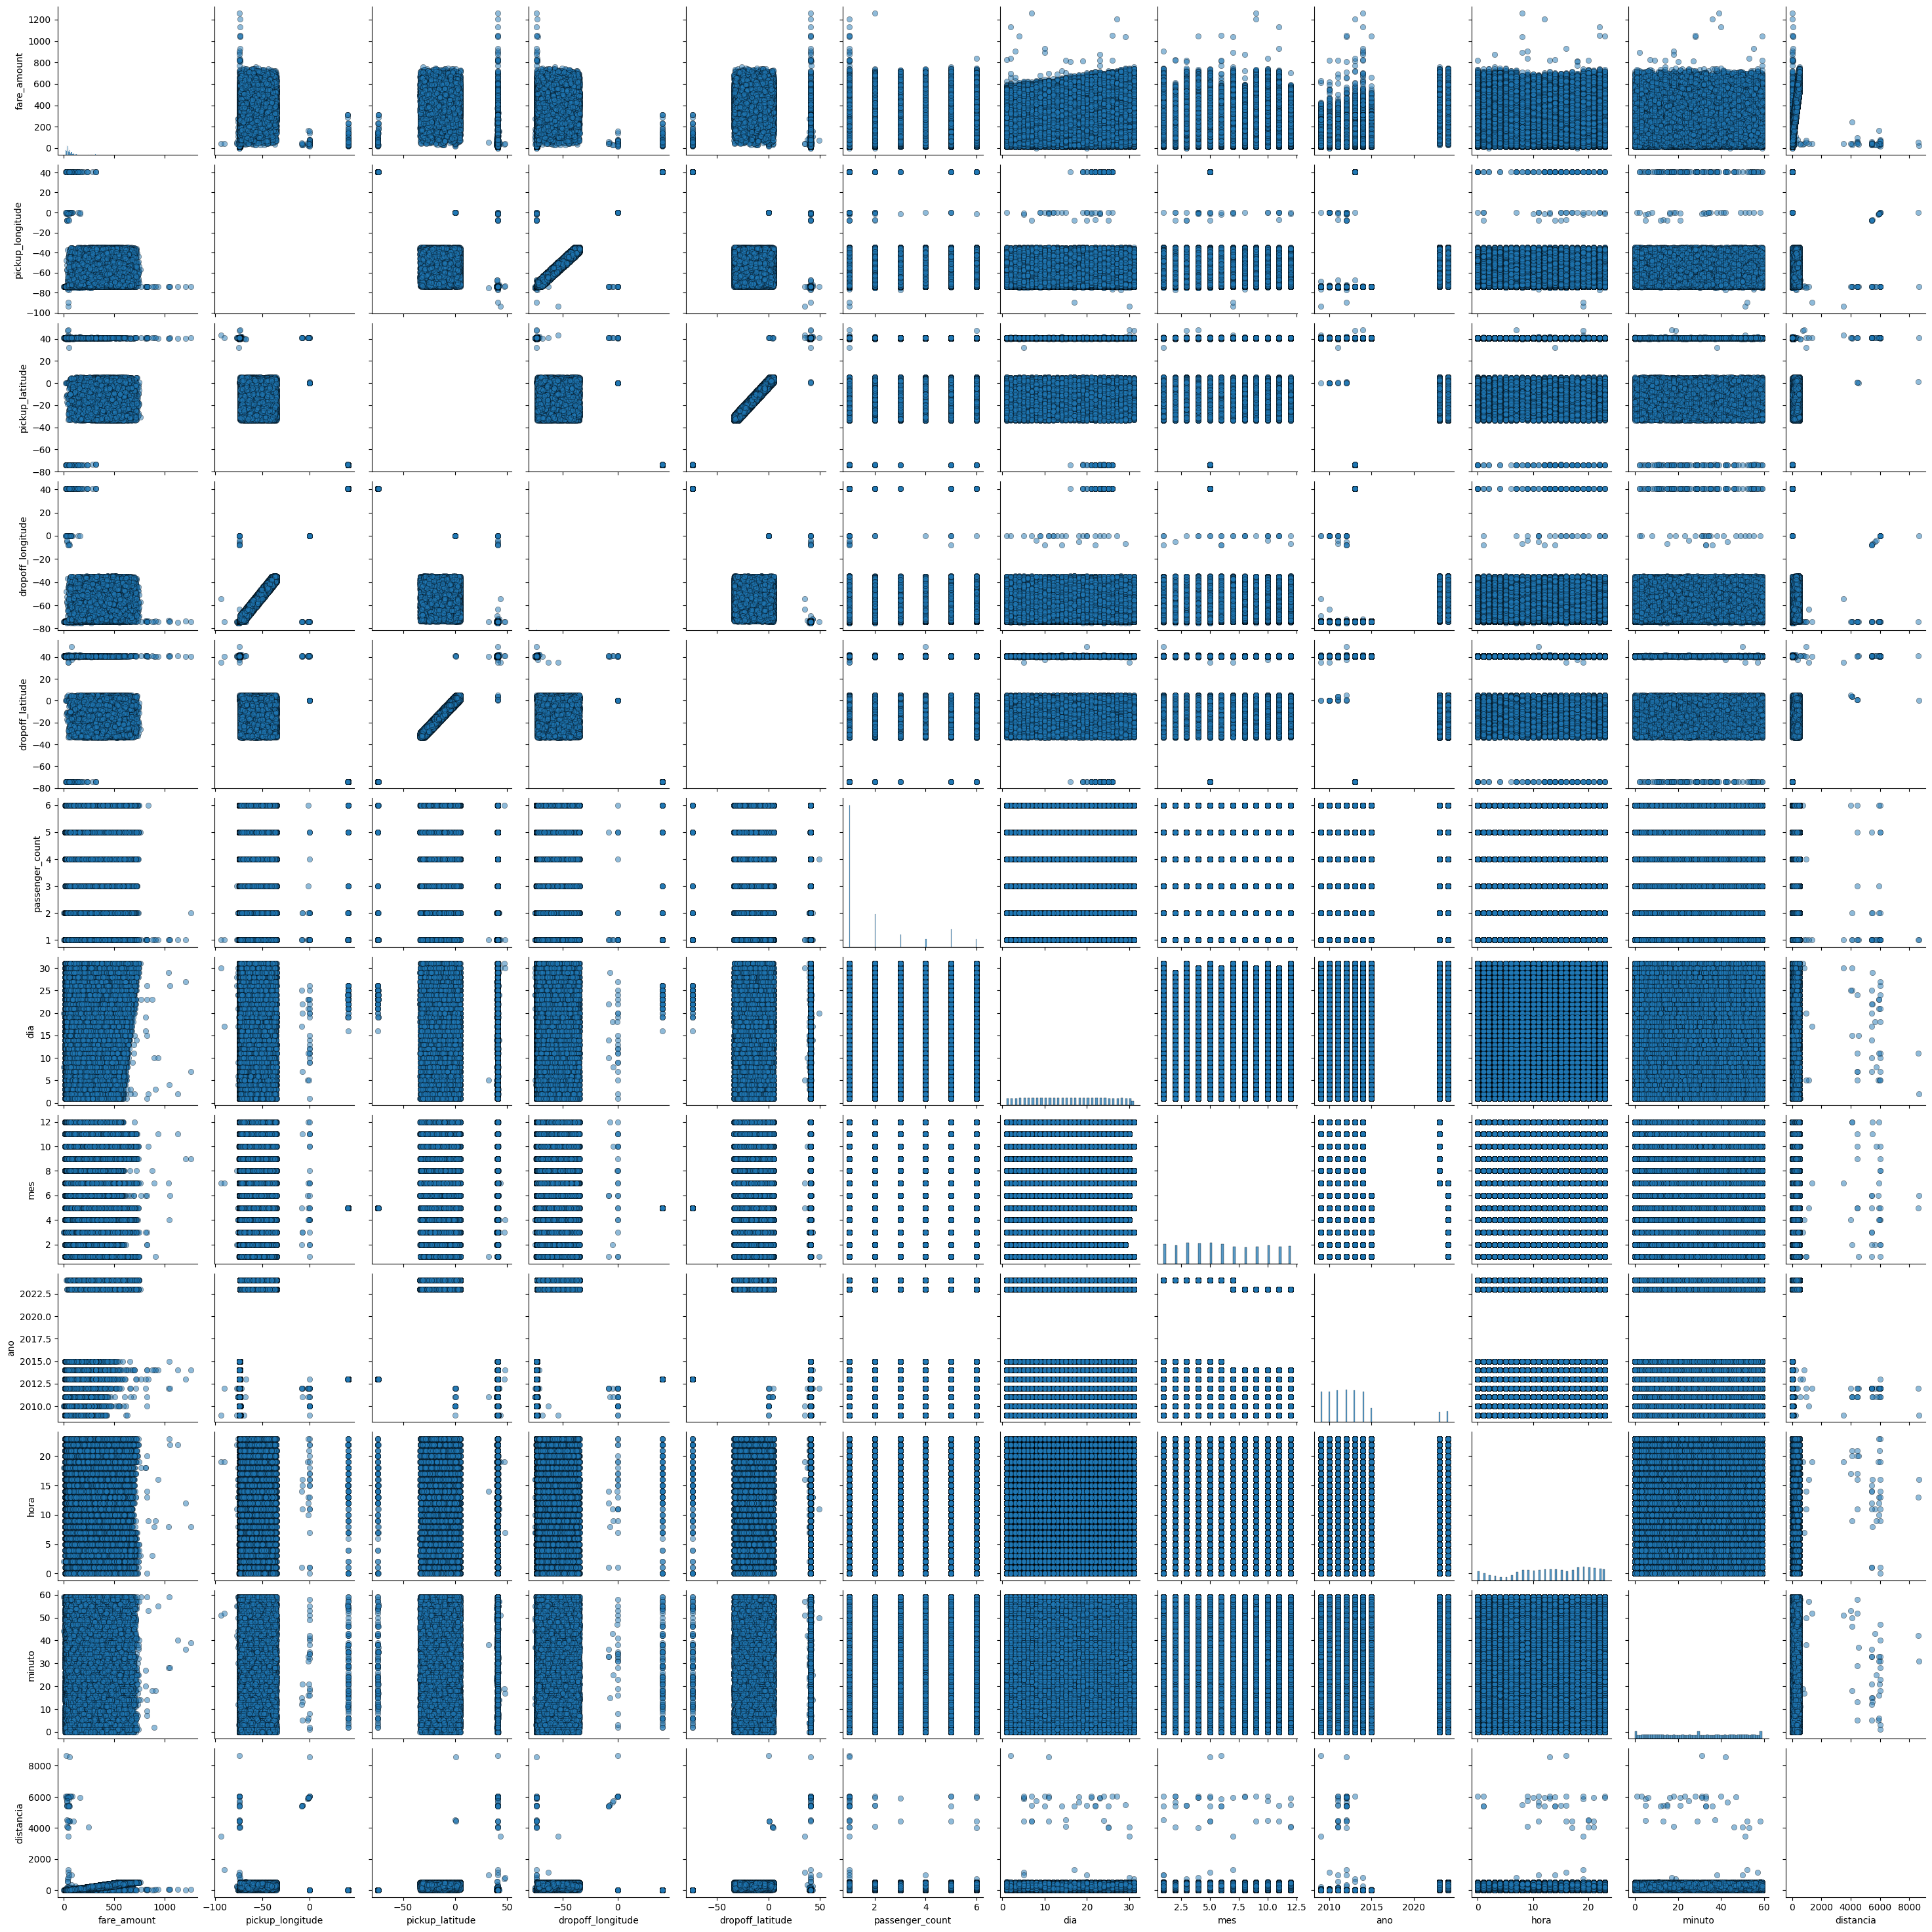

In [13]:
# Correlação em um único plot

sns.pairplot(uber, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

        fare_amount  distancia  passenger_count  mes
189718      1259.29     37.989                2    9
28132       1204.54      2.914                1    9
22761       1129.96     60.101                1   11
38196       1050.14     36.703                1    6
109759      1044.83     46.086                1    4
17716       1040.28     60.851                1    7
43370        930.78     52.108                1   11
101644       905.21     41.225                1    1
87273        892.45     31.688                1    7
139541       876.03     33.599                1    8


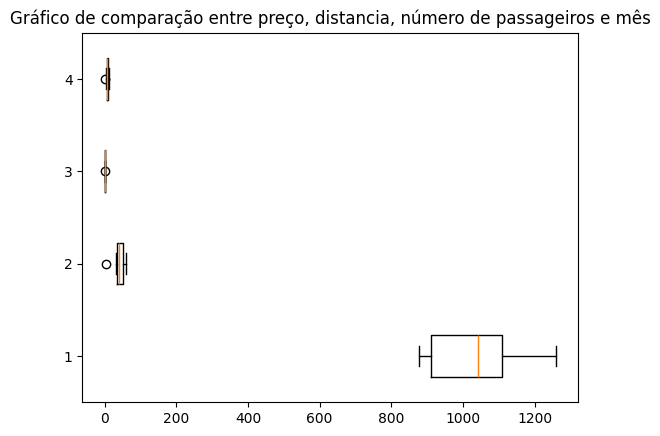

In [14]:
# Boxplot mostrando a distribuição de dados entre fare_amount, distancia, passenger_count, mes de uma forma resumida e visual
# É uma ferramenta útil para identificar valores extremos e assimetrias nos dados, além de permitir a comparação de diferentes conjuntos de dados.

preco = uber
preco = preco.sort_values('fare_amount', ascending=False)[['fare_amount', 'distancia', 'passenger_count', 'mes']].head(10)
print(preco.head(10))

plt.boxplot(preco, vert = 0, patch_artist = False)
# plt.boxplot(boxplot_preco['distancia'], vert=True)
# plt.xlabel('Preço')
# plt.ylabel('Preço')
plt.title('Gráfico de comparação entre preço, distancia, número de passageiros e mês')
plt.show()

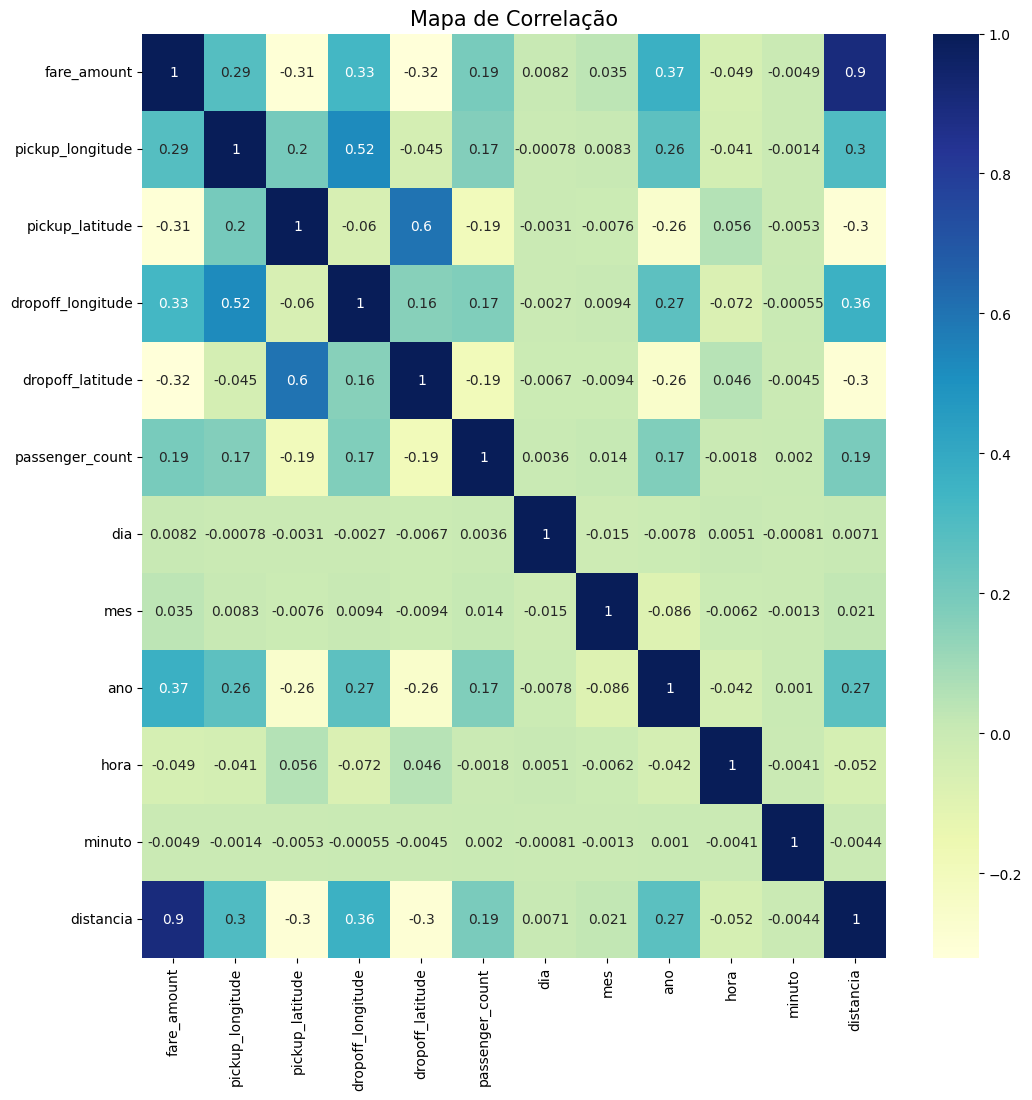

In [16]:
# Analise de correlação
# Matriz de correlação

plt.figure(figsize = (12,12))
sns.heatmap(uber.corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação", fontsize = 15)
plt.show()